Class in OOP

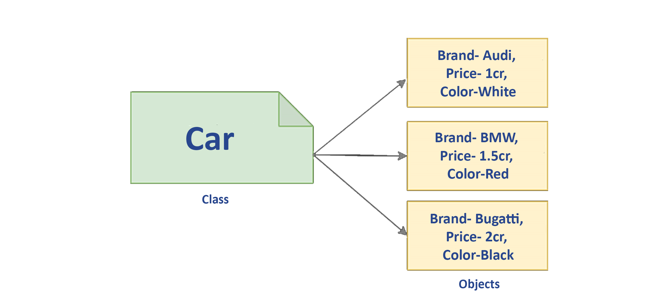

In [1]:
a =23
print(type(a))

<class 'int'>


In [2]:
c = [1, 2, 3, 4, 5]
print(type(c))

<class 'list'>


In [3]:
c.append(7)
c

[1, 2, 3, 4, 5, 7]

In [4]:
d = {
    101: "Utkarsh",
    102: "Rahul",
    103: "Raman"
}
print(type(d))

<class 'dict'>


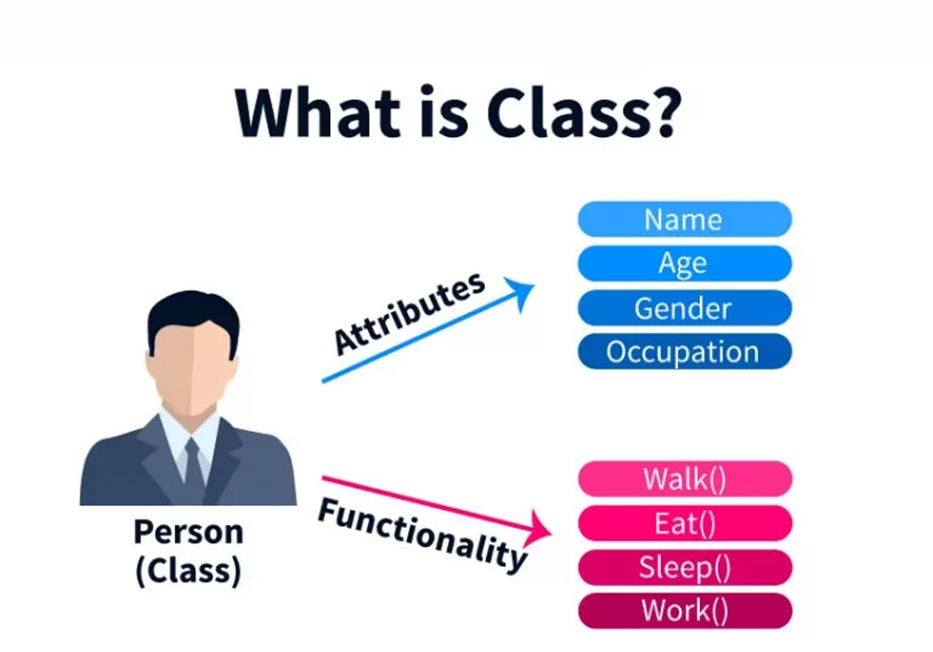

In [5]:
emp = {
    "id": [101, 102, 103],
    "name": ["Raman", "Rahul", "Aditi"],
    "dept": ["HR", "Sales", "Engg."],
    "sal": [27000, 32000, 48000]
}

In [6]:
type(emp)

dict

In [7]:
import pandas as pd
df = pd.DataFrame(emp)

In [8]:
df

,id,name,dept,sal
0,101,Raman,HR,27000
1,102,Rahul,Sales,32000
2,103,Aditi,Engg.,48000


In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Attributes in dataframe

1. shape
2. dtype
3. columns
4. index
5. values

In [10]:
df.columns

Index(['id', 'name', 'dept', 'sal'], dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [12]:
df.dtypes

id       int64
name    object
dept    object
sal      int64
dtype: object

In [13]:
df.values

array([[101, 'Raman', 'HR', 27000],
       [102, 'Rahul', 'Sales', 32000],
       [103, 'Aditi', 'Engg.', 48000]], dtype=object)

In [14]:
type(df.values)

numpy.ndarray

### Functions in dataframe

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   name    3 non-null      object
 2   dept    3 non-null      object
 3   sal     3 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 228.0+ bytes


more functions like

df.sort_values((by="sal", ascending=False),  
df.agg({}),  
df.head().  

### Creating a user defined class

self - is any object belonging to respective class

In [16]:
class Person:

    # Store the attributes of class in constructor function
    def __init__(self, name, age, gender, occupation):
        self.name = name
        self.age = age
        self.gender = gender
        self.occupation = occupation

    # You can create as many functions as you want in above
    def introduce(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")
        print(f"I am {self.gender}")
        print(f"I work as a {self.occupation}")

In [17]:
p1 = Person("Utkarsh", 30, "Male", "Engineer")
p1

In [18]:
print(type(p1))

<class '__main__.Person'>


In [19]:
p1.name

'Utkarsh'

In [20]:
p1.age

30

In [21]:
p1.gender

'Male'

In [22]:
p1.occupation

'Engineer'

In [23]:
p1.occupation = "Data Scientist"

In [24]:
p1.introduce()

My name is Utkarsh
I am 30 years old
I am Male
I work as a Data Scientist


In [25]:
p2 = Person(name="Aditi", age=28, gender="Female", occupation="HR")
type(p2)

__main__.Person

In [26]:
p2.name

'Aditi'

In [27]:
p2.introduce()

My name is Aditi
I am 28 years old
I am Female
I work as a HR


### DataClasses

in dataclass __post_init__ is used for validation

In [28]:
from dataclasses import dataclass
from typing import Literal

In [29]:
@dataclass
class Person2:
    name: str
    age: int
    gender: Literal["male", "female"]
    occupation: str

    def __post_init__(self):
        errors = []

        if type(self.name) != str:
            errors.append("Name should be a string")
        if type(self.age) != int or (self.age <= 0):
            errors.append("Age should be a positive integer")
        if self.gender not in ["male", "female"]:
            errors.append("Gender should be either male or female")
        if type(self.occupation) != str:
            errors.append("Occupation should be a string")

        if errors:
            raise ValueError("\n".join(errors))
        
    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")
        print(f"I am {self.gender}")
        print(f"I work as {self.occupation}")

In [30]:
p4 = Person2(name= "Rahul", age=35, gender="male", occupation="Purchase")
p4

Person2(name='Rahul', age=35, gender='male', occupation='Purchase')

In [31]:
type(p4)

__main__.Person2

In [32]:
p4.age

35

In [33]:
p4.intro()

My name is Rahul
I am 35 years old
I am male
I work as Purchase


In [34]:
p5 = Person2(name= "Raman", age="Twenty Three", gender="male", occupation="HR")

ValueError: Age should be a positive integer

In [40]:
p5 = Person2(name= 23, age=-1, gender="M", occupation=1.5)

ValueError: Name should be a string
Age should be a positive integer
Gender should be either male or female
Occupation should be a string

### Bank account class
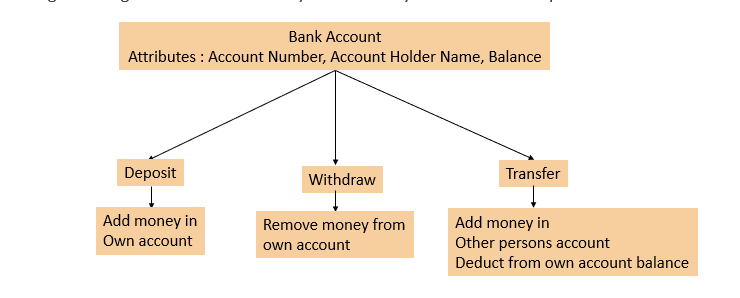

In [35]:
@dataclass
class Account:
    ac_no: int
    name: str
    bal: float

    def __post_init__(self):
        errors = []

        if type(self.ac_no) != int or self.ac_no <= 0:
            errors.append("Account number should be postive integer")
        if type(self.name) != str or len(self.name) == 0:
            errors.append("Name should be a string and should not be blank")
        if type(self.bal) != float:
            errors.append("Balance should be a float type")

        if errors:
            raise ValueError("\n".join(errors))
        
    def check_balance(self):
        print(f"Current balance in {self.ac_no} is {self.bal:.2f} INR")

    def deposit(self, amt: float):
        self.bal = self.bal + amt
        print(f"Amount of {amt:.2f} INR deposited in {self.ac_no}")

    def withdraw(self, amt: float):
        if self.bal < amt:
            raise ValueError("Insufficient balance!")
        else:
            self.bal = self.bal - amt
            print(f"Amount of {amt:.2f} INR withdraw from {self.ac_no}")

    def transfer(self, amt: float, ac2):
        self.withdraw(amt)
        ac2.deposit(amt)

In [37]:
ac1 = Account(ac_no=1234, name="Raman", bal=1000000.0)

In [38]:
ac1

Account(ac_no=1234, name='Raman', bal=1000000.0)

In [39]:
ac1.ac_no

1234

In [40]:
ac1.bal

1000000.0

In [42]:
ac1.check_balance()

Current balance in 1234 is 1000000.00 INR


In [43]:
ac1.deposit(5000)

Amount of 5000.00 INR deposited in 1234


In [45]:
ac1.check_balance()

Current balance in 1234 is 1005000.00 INR


In [52]:
ac1.withdraw(200)

Amount of 200.00 INR withdraw from 1234


In [54]:
ac1.withdraw(5000000.0)

ValueError: Insufficient balance!

In [47]:
ac2 = Account(ac_no=7890, name="Priya", bal=50000.0)
ac2

Account(ac_no=7890, name='Priya', bal=50000.0)

In [48]:
ac2.ac_no

7890

In [49]:
ac2.name

'Priya'

In [50]:
ac2.bal

50000.0

In [51]:
ac2.check_balance()

Current balance in 7890 is 50000.00 INR


#### Transfer 800 INR withdraw from 1234

In [55]:
ac1.transfer(800.0, ac2)

Amount of 800.00 INR withdraw from 1234
Amount of 800.00 INR deposited in 7890


In [56]:
ac1.check_balance()

Current balance in 1234 is 503800.00 INR


In [57]:
ac2.check_balance()

Current balance in 7890 is 50800.00 INR


## Assignment

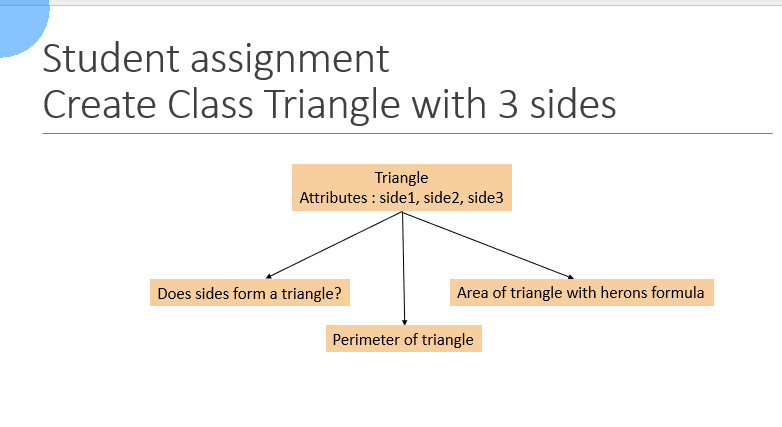